 ![bse_logo_textminingcourse](https://bse.eu/sites/default/files/bse_logo_small.png)

# Fine Tuning Model: DreamBooth Inference

The following code is for the inference part of the DreamBooth model found in the notebook "DreamBooth.ipynb" in section 4. Fine Tuning Models. 

### Import Packages and Install Diffusion libraries

In [26]:
import os
import shutil

# Image Display
from PIL import Image
import IPython.display as display
import matplotlib.pyplot as plt

In [27]:
# Diffuser libraries 

!pip install -qq "ipywidgets>=7,<8"
!git clone https://github.com/huggingface/diffusers
!pip install ./diffusers

In [28]:
%cd /kaggle/working/diffusers/examples/dreambooth
!pip install -r requirements.txt
!pip install bitsandbytes
!pip install transformers gradio ftfy accelerate
!pip install xformers

In [29]:
# Model Training 
from diffusers import DiffusionPipeline, UNet2DConditionModel
from transformers import CLIPTextModel
import torch

In [30]:
!pip install huggingface_hub

Replace "TOKEN" with own personal Hugging Face token in order to save model in a private model and dataset. 

In [31]:
from huggingface_hub import login
login(token="TOKEN") 

For instructions on how to set up the secret token on Kaggle: https://github.com/maelysjb/Comics-GenAI/blob/main/README.md#:~:text=.gitignore-,README,-.md

In [32]:
from kaggle_secrets import UserSecretsClient
secret_label = "HUGGINGFACE_TOKEN"
secret_value = UserSecretsClient().get_secret(secret_label)

### Loading the trained model 

Replace the base model path with the desired Hugging Face reposotory

In [35]:
# Define the base Hugging Face repository path
base_model_path = 'nataliabeltran/DreamBooth2000' 

# Load UNet2DConditionModel from the specific subfolder
unet = UNet2DConditionModel.from_pretrained(base_model_path, subfolder='unet', torch_dtype=torch.float16)

# Load CLIPTextModel from the specific subfolder
text_encoder = CLIPTextModel.from_pretrained(base_model_path, subfolder='text_encoder', torch_dtype=torch.float16)

# Create the pipeline
pipeline = DiffusionPipeline.from_pretrained(
    "runwayml/stable-diffusion-v1-5", unet=unet,
    text_encoder=text_encoder, torch_dtype=torch.float16,
).to("cuda")

# Check models are loaded successfully
print("UNet2DConditionModel loaded successfully.")
print("CLIPTextModel loaded successfully.")



Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

### Inference  function 

In [37]:
import IPython.display as display

def inference(prompt, num_samples, negative_prompt, guidance_scale,
              num_inference_steps, height, width):
    images = pipeline(
        prompt,
        height=height,
        width=width,
        negative_prompt=negative_prompt,
        num_images_per_prompt=num_samples,
        num_inference_steps=num_inference_steps,
        guidance_scale=guidance_scale
    ).images
    for i, image in enumerate(images):
        image.save(f"generated_image_{i}.png") 
        print(f"Generated image {i}:")
        display(image)  

### Display outputs from DreamBooth model
To generate different images of the character/data change the prompt ensuring to keep the same phrasing that was used while training. 

More images at different training steps for the different models can be found here: https://github.com/maelysjb/Comics-GenAI/tree/main/6.%20Generated%20Images

In [40]:
from IPython.display import display  # Ensure correct import
from PIL import Image

  0%|          | 0/50 [00:00<?, ?it/s]

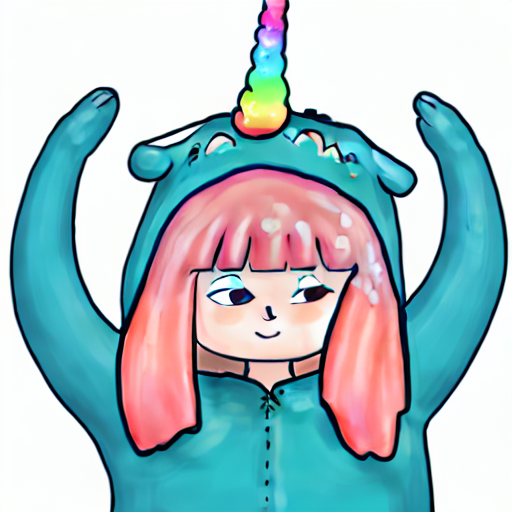

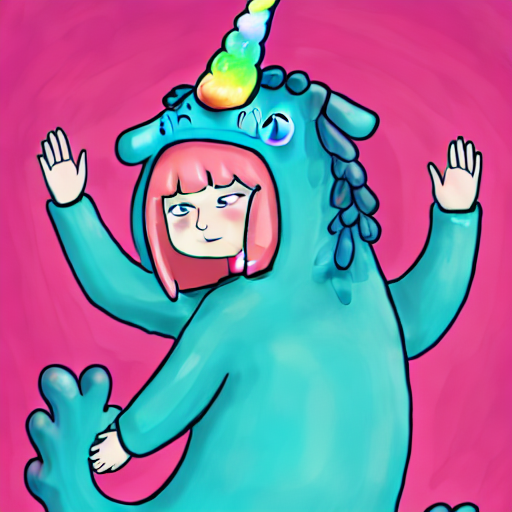

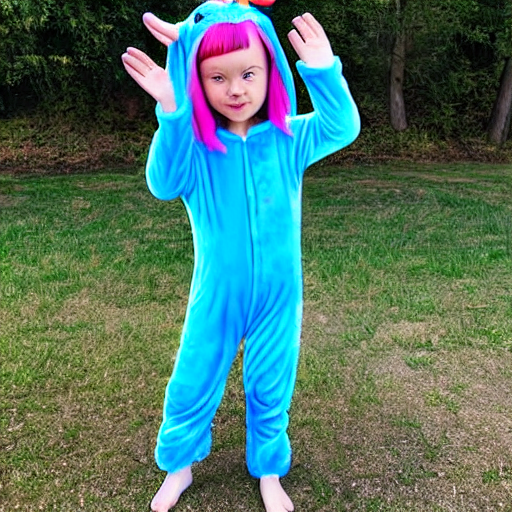

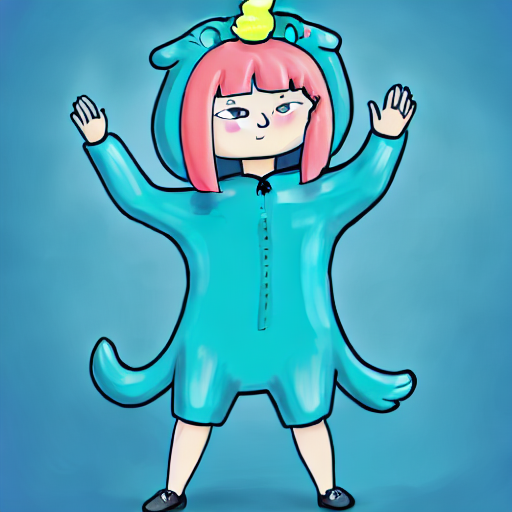

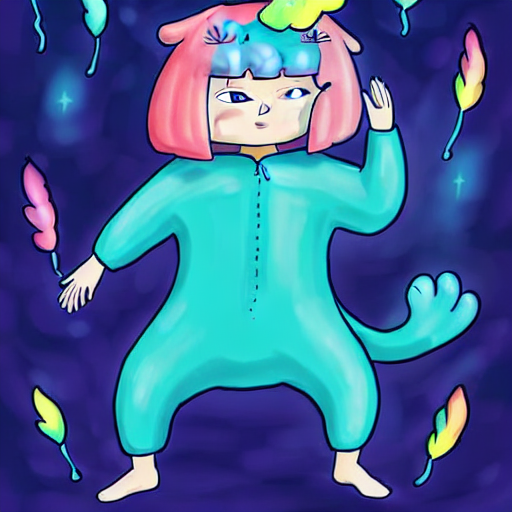

In [43]:
prompt = "An image of UnicornGirl in unicorn onesie with hands on face"
num_samples = 5
negative_prompt = ""
guidance_scale = 7.5
num_inference_steps = 50
height = 512
width = 512

inference(prompt, num_samples, negative_prompt, guidance_scale, num_inference_steps, height, width)